<a class="anchor" id="0"></a>
# Question: Can we build a chatbot talk like a movie star? 🤖🎥
* Can this chatbot be personalized? 😉
* Can we build a model with limited data? 🤔
* Can this model be modified while interact with person? 💬
* Can we build using pytorch? 🔨

Dataset used is [Movie Dialog Corpus from Cornell University](https://www.kaggle.com/Cornell-University/movie-dialog-corpus)

<a class="anchor" id="0.1"></a>
## Table of Contents
### 1. [Data Visualization](#1)
- 1.1 [Word cloud](#1.1)
- 1.2 [Dialogue distribution](#1.2)

### 2. [Data Clean](#2)

### 1. Data Visualization <a class="anchor" id="1"></a>
Here we read in the four files with conversations from movie characters. 
To visualize the data, we randomly choose a character in a movie and see his/her dialog wordcloud.

[Back to Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import os
import collections
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from lib.data_clean import *
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm, trange
import warnings
warnings.filterwarnings('ignore')

In [2]:
# checkout what is in this movie dialog dataset
print(os.listdir("./data/movie-dialog-corpus/"))

['movie_conversations.tsv', 'movie_titles_metadata.tsv', 'movie_characters_metadata.tsv', 'movie_lines.tsv', 'README.txt', '.ipynb_checkpoints', 'raw_script_urls.tsv']


In [3]:
# checkout the conversation file
conv_df = pd.read_csv("./data/movie-dialog-corpus/movie_conversations.tsv", encoding='utf-8-sig', warn_bad_lines=False,sep='\t', header=None)
conv_df.columns = ['chId', 'chId2', 'mId', 'lines']
conv_df.head()

,chId,chId2,mId,lines
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [4]:
# check the movie lines file
line_df = pd.read_csv("./data/movie-dialog-corpus/movie_lines.tsv", sep='\t', warn_bad_lines=False, error_bad_lines=False,header=None)
line_df.columns = ['lineId', 'chId', 'mId', 'chName','dialogue']
line_df.head()

,lineId,chId,mId,chName,dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [5]:
# checkout the movie character file
char_df = pd.read_csv("./data/movie-dialog-corpus/movie_characters_metadata.tsv", sep='\t', warn_bad_lines=False, error_bad_lines=False,header=None)
char_df.columns = ['chId', 'chName', 'mId', 'mName', 'gender', 'rank']
char_df.head()

,chId,chName,mId,mName,gender,rank
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [6]:
# checkout the movie meta data file
movie_df = pd.read_csv("./data/movie-dialog-corpus/movie_titles_metadata.tsv", sep='\t', warn_bad_lines=False, error_bad_lines=False,header=None)
movie_df.columns = ['mId', 'mName', 'year', 'rating', 'numVotes', 'genres']
movie_df.head()

,mId,mName,year,rating,numVotes,genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [7]:
# all lines of dialogs
lines = line_df['dialogue'].to_list()
print(f'Total {len(lines)} utterances')
print(lines[:3])

Total 293202 utterances
['They do not!', 'They do to!', 'I hope so.']


In [8]:
# all characters
char_id = line_df['chId'].to_list()
print(f'Number of unique characters is {len(set(char_id))}')
print(char_id[:3])

Number of unique characters is 8758
['u0', 'u2', 'u0']


In [9]:
# all character names
char_name = line_df['chName'].to_list()
print(f'Number of unique names is {len(set(char_name))}')
print(char_name[:3])

Number of unique names is 5215
['BIANCA', 'CAMERON', 'BIANCA']


In [10]:
# build a dictionary, with key as character id, and value as all dialogs by this character
char_line = collections.defaultdict(list) 
for i in range(len(lines)):
    char_line[char_id[i]].append(lines[i])

In [11]:
print(char_line['u100'])

['She died in her sleep three days ago.  It was in the paper...', "Tom... she's dead.", 'What?', 'Who are you calling?', 'What was I supposed to think happened to you?!', "You're killing me...", "Look where we are.  Look at yourself.  You son of a bitch you don't have any idea what you're putting me through...", 'You should have.', "No I don't because you're not telling me anything!", "You couldn't?", "You owe me an explanation.  You can't treat me like this.", "You're sorry?  What was I supposed to think?", "Why haven't you called?  Why don't you answer your phone?", 'Tom...', "What's going on Tom?  What happened?", 'What happened to you?', "... What's going on?", "What's wrong?  Are you alright?", 'Tom?  Where have you been... ?', 'Hello?', 'Why the gun?', 'I know.', 'I understand.', "Betty's out of town so we're playing next week.", "You're not using the same guy who tried to fix it?", "You think you'll have time for the water heater this weekend?", 'I love you.', "You better not be

### 1.1. Word cloud <a class="anchor" id="1.1"></a>

[Back to Table of Contents](#0.1)

(-0.5, 399.5, 199.5, -0.5)

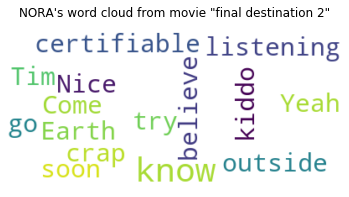

In [12]:
# randomly sample a character ID
char_sample = char_df.sample(1)['chId'].values[0]

# get the character info
char_info = char_df.loc[char_df['chId'] == char_sample]
chName = char_info['chName'].values[0]
mName = char_info['mName'].values[0]

# extract the dialogs from this character
dialogues = char_line[char_sample]
words = [word for d in dialogues for word in d.split(" ")]

# build word cloud
wordcloud = WordCloud(max_font_size=40,background_color="white").generate(" ".join(words))

# show the wordcloud
plt.figure()
plt.title("%s's word cloud from movie \"%s\""%(chName,mName))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

### 1.2. Dialogue distribution <a class="anchor" id="1.2"></a>

[Back to Table of Contents](#0.1)

In [13]:
conv_df.head()

,chId,chId2,mId,lines
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [17]:
line_df.head()


,lineId,chId,mId,chName,dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [19]:
line_df = line_df.set_index('lineId')
def build_conversation(lines):
    id_list = lines[1:-2].replace('\'', '').split(' ')
    def build_utterance(line):
        return (line.chId, line.dialogue)
    try:
        return [build_utterance(line_df.loc[line_id]) for line_id in id_list]
    except KeyError:
        return []
    
conversations = [build_conversation(lines) for lines in tqdm(conv_df.lines)]
# conversations = []
# for lines in conv_df.lines:
#     id_list =  lines[1:-2].replace('\'', '').split(' ')
#     conv = []
#     for line_id in id_list:
#         try:
#             conv.append((line_df.loc[line_df['lineId'] ==line_id].chId, line_df.loc[line_df['lineId'] ==line_id].dialogue))
#         except:
#             conv.append([])
#     conversations.append(conv)


In [20]:
# for lines in conv_df.lines:
#     id_list =  lines[1:-2].replace('\'', '').split(' ')
# line_df = line_df.set_index('lineId')
# for line_id in id_list:
#     print(line_df.loc[line_df['lineId'] == 'L1045'].dialogue)
#     print(line_df.loc['L1045'].dialogue)
print(f'in total {len(conversations)} conversations')
conversations[1]

in total 83097 conversations


[('u0', "You're asking me out.  That's so cute. What's your name again?"),
 ('u2', 'Forget it.')]

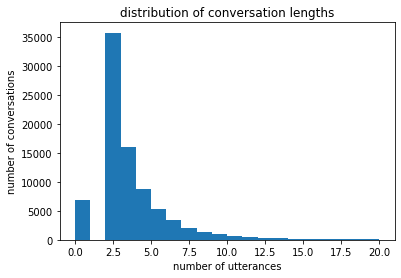

In [21]:
plt.title('distribution of conversation lengths')
plt.xlabel('number of utterances')
plt.ylabel('number of conversations')
plt.hist([len(c) for c in conversations], bins=20, range=(0, 20))
plt.show()

In [22]:
conversations = [c for c in conversations if len(c) > 2]
print(f'{len(conversations)} conversations remain')

40588 conversations remain


In [23]:
# plt.title('distribution of conversation character counts')
# plt.xlabel('number of characters')
# plt.ylabel('number of conversations')
# plt.hist([sum(len(u[1]) for u in c) for c in conversations], bins=64, range=(0, 2000))
# plt.show()

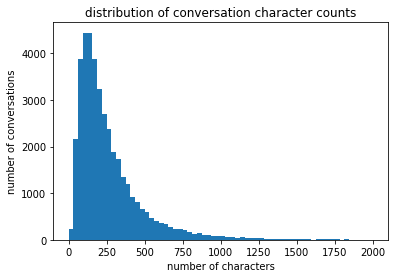

In [24]:
char = []
for c in conversations:
    sum_of = 0
    for u in c:
        try:
            sum_of += len(u[1])
        except:
            sum_of += 0
    char.append(sum_of)

    
plt.title('distribution of conversation character counts')
plt.xlabel('number of characters')
plt.ylabel('number of conversations')
plt.hist(char, bins=64, range=(0, 2000))
plt.show()

In [25]:
def speaker_repeated(conversation):
    for idx in range(1, len(conversation)):
        if conversation[idx][0] == conversation[idx-1][0]:
            return True
    return False

conversations = [conv for conv in conversations if not speaker_repeated(conv)]
print(f'{len(conversations)} conversations remain')


40060 conversations remain


### 2. Data Clean <a class="anchor" id="2"></a>
But this type of clean seems to remove some important and informative information. Probably I shall try training the model with uncleaned data. 

[Back to Table of Contents](#0.1)

In [26]:
# select dialogue that is not null
line_df_clean = line_df[line_df['dialogue'].notnull()]
print(f'Before remove null, the number of utterances is {len(line_df)}')
print(f'After remove null, the number of utterances is {len(line_df_clean)}')
line_df_clean.head()

Before remove null, the number of utterances is 293202
After remove null, the number of utterances is 288663


,chId,mId,chName,dialogue
lineId,,,,
L1045,u0,m0,BIANCA,They do not!
L1044,u2,m0,CAMERON,They do to!
L985,u0,m0,BIANCA,I hope so.
L984,u2,m0,CAMERON,She okay?
L925,u0,m0,BIANCA,Let's go.


In [27]:
word_lemmatizer = WordNetLemmatizer()
def clean_dialogue(dialogue):
    # remove non-letters
    letter_only = re.sub("[^a-zA-Z]", " ", dialogue)
    # covert to lower case and split into individual words
    words = letter_only.lower().split()
    # remove stop words and lemmatize the word
    stops = set(stopwords.words("english"))
    nonstop_words = [word_lemmatizer.lemmatize(w) for w in words if not w in stops]
    # join and return
    return (" ".join(nonstop_words))

In [28]:
line_df_clean['cleaned_dialogue'] = line_df_clean['dialogue'].apply(clean_dialogue)

In [29]:
line_df_clean.head()

,chId,mId,chName,dialogue,cleaned_dialogue
lineId,,,,,
L1045,u0,m0,BIANCA,They do not!,
L1044,u2,m0,CAMERON,They do to!,
L985,u0,m0,BIANCA,I hope so.,hope
L984,u2,m0,CAMERON,She okay?,okay
L925,u0,m0,BIANCA,Let's go.,let go


## Acknowledgements
Good resources used: 
* https://www.kaggle.com/Cornell-University/movie-dialog-corpus
* https://www.kaggle.com/akerlyn/wordcloud-based-on-character
* https://emojipedia.org/
* https://www.kaggle.com/malyvsen/chatbot-movie-dialogs